# Gramener Case Study - EDA Case Study

In this case we are conducting and EDA to identify loan related risks for a largest online loan marketplace Company.

## Objective
undertanding driving factors behind loan default

In [1]:
# Downloading and importing the dataset from the link 
# https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip
# importing libraries to download the dataset and read in this environment 
# as this a drive link (REST API link) will not use of BeautifulSoup4 and requests 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from io import BytesIO
from zipfile import ZipFile
import requests
from scipy import stats
from scipy.stats import zscore

In [2]:
# downloading the Zip file from Source
url = "https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip"
content = requests.get(url)
# unzip the content
file = ZipFile(BytesIO(content.content)).extract('loan.csv')
# reading the file in the environment
loan = pd.read_csv(file, low_memory=False)

# setting the environment to display all the rows
pd.options.display.max_rows = 1000

# viewing first few (5) rows in transpose format to fit more data in screen
loan.head().transpose()
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.000000e+00,8.000000e+00


In [3]:
# viewing Data Types
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [4]:
# fixing categorical Columns
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','member_id','id','verification_status',
            'loan_status','purpose','addr_state','delinq_2yrs','mths_since_last_delinq',
            'mths_since_last_record','open_acc','inq_last_6mths','pub_rec','total_acc','initial_list_status',
            'policy_code','application_type','chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens']
loan[cat_cols] = loan[cat_cols].apply(lambda x: x.astype('category'))

# fixing Date Columns and extracting date and month from issue_d
# as entire Date columns are in month year format its better to convert them as categorical data 

loan['issue_dm'], loan['issue_dy'] = loan['issue_d'].str.split('-',1).str
loan['issue_dy'] = '20'+ loan['issue_dy']
date_cols = ['issue_d','last_pymnt_d','next_pymnt_d', 'last_credit_pull_d','issue_dm','issue_dy']
loan[date_cols] = loan[date_cols].apply(lambda x: x.astype('category'))
print(loan.dtypes)
loan[date_cols]

id                                category
member_id                         category
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                              category
int_rate                            object
installment                        float64
grade                             category
sub_grade                         category
emp_title                           object
emp_length                        category
home_ownership                    category
annual_inc                         float64
verification_status               category
issue_d                           category
loan_status                       category
pymnt_plan                          object
url                                 object
desc                                object
purpose                           category
title                               object
zip_code                            object
addr_state 

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,issue_dm,issue_dy
0,Dec-11,Jan-15,NaN,May-16,Dec,2011
1,Dec-11,Apr-13,NaN,Sep-13,Dec,2011
2,Dec-11,Jun-14,NaN,May-16,Dec,2011
3,Dec-11,Jan-15,NaN,Apr-16,Dec,2011
4,Dec-11,May-16,Jun-16,May-16,Dec,2011
5,Dec-11,Jan-15,NaN,Jan-16,Dec,2011
6,Dec-11,May-16,NaN,May-16,Dec,2011
7,Dec-11,Jan-15,NaN,Dec-14,Dec,2011
8,Dec-11,Apr-12,NaN,Aug-12,Dec,2011
9,Dec-11,Nov-12,NaN,Mar-13,Dec,2011


In [5]:
#checking datatypes
loan.dtypes

id                                category
member_id                         category
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                              category
int_rate                            object
installment                        float64
grade                             category
sub_grade                         category
emp_title                           object
emp_length                        category
home_ownership                    category
annual_inc                         float64
verification_status               category
issue_d                           category
loan_status                       category
pymnt_plan                          object
url                                 object
desc                                object
purpose                           category
title                               object
zip_code                            object
addr_state 

In [6]:
# looking at glimpse of data to look for any more data cleaning opportunity
loan.head().transpose()

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975,2500,2400,10000,3000
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5


In [7]:
# handling missing Data 
print(loan.shape)
# (39717, 113)
# column wise
loan.isnull().sum()

(39717, 113)


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
# looking at % of missing values 
Missing = round(100*(loan.isnull().sum()/len(loan.index)),2)
print(Missing)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [9]:
# removing Columns from dataframe with morethan 90% missing values
Remove = Missing[Missing>90]
remove_colnames = list(Remove.index.values)
print(remove_colnames)

['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort'

In [10]:
# Removing the null columns and a few unimportant columns as 'id','member_id', 'url', 'desc', 'title',
loan.drop(remove_colnames, axis=1, inplace = True)
print(loan.shape)
loan.dtypes
print(loan.sum()==0) # removing as sum is 0

(39717, 57)
id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                    False
url                           False
purpose                       False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths                False
mths_since_last_delinq        False
open_acc                      False
pub_rec                       False
revol_bal       

In [11]:
# removing columns
remove_cols = list(['id','member_id', 'url', 'desc', 'title', 'collections_12_mths_ex_med','acc_now_delinq', 'delinq_amnt', 'tax_liens'])
loan.drop(remove_cols, axis=1, inplace = True)
print(loan.shape)

(39717, 48)


In [12]:
# checking row - wise missing data
row_missing = loan.isnull().sum(axis = 1)
print(row_missing)
print(max(row_missing))

# no need to remove any rows as a nominal data is missing (only missing in 4 columns per row maximum)

0        2
1        1
2        2
3        0
4        0
5        1
6        1
7        1
8        2
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       0
17       1
18       0
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       2
27       0
28       0
29       1
30       2
31       1
32       0
33       0
34       1
35       1
36       1
37       1
38       1
39       1
40       1
41       0
42       2
43       1
44       1
45       0
46       1
47       1
48       1
49       1
50       1
51       1
52       1
53       1
54       1
55       1
56       1
57       1
58       1
59       1
60       1
61       2
62       1
63       1
64       1
65       1
66       1
67       1
68       1
69       1
70       1
71       0
72       0
73       1
74       1
75       0
76       0
77       1
78       1
79       0
80       0
81       1
82       1
83       1
84       0
85       1
86       1
87       1
88       1
89       1
90       1

In [13]:
# Fixing int_rate and revol_util Columns
loan['int_rate'] = loan['int_rate'].map(lambda x: str(x)[:-1])
loan['int_rate'].head()

loan['revol_util'] = loan['revol_util'].map(lambda x: str(x)[:-1])
loan['revol_util'].head()

0    83.70
1     9.40
2    98.50
3       21
4    53.90
Name: revol_util, dtype: object

In [14]:
# Viewing the Summary of DataFrame
num_cols = loan.describe().columns

In [15]:
# checking outliers
np.seterr(divide='ignore', invalid='ignore') # to supress devide by zero or NaN error
z = np.abs(loan[num_cols].apply(zscore))
round((z>=3).sum()/len(loan.index)*100,2)

loan_amnt                  1.81
funded_amnt                1.53
funded_amnt_inv            1.48
installment                0.83
annual_inc                 0.73
dti                        0.00
revol_bal                  2.19
out_prncp                  1.67
out_prncp_inv              1.66
total_pymnt                1.54
total_pymnt_inv            1.57
total_rec_prncp            1.21
total_rec_int              2.27
total_rec_late_fee         2.11
recoveries                 0.95
collection_recovery_fee    0.70
last_pymnt_amnt            2.55
dtype: float64

In [16]:
# Removing all outliers haveing z => 3
loan_final = loan[(z < 3).all(axis=1)]
loan_final['default_rate'] = loan_final['']

In [17]:
loan_final.shape
print('removed data as % of total rows', round((1-(loan_final.shape[0]/loan.shape[0]))*100,2))

removed data as % of total rows 11.51


In [18]:
# looking at final dataset for planning further steps
loan_final.head().transpose()

,0,1,2,3,4
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975,2500,2400,10000,3000
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65,15.27,15.96,13.49,12.69
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5
emp_title,NaN,Ryder,NaN,AIR RESOURCES BOARD,University Medical Group
emp_length,10+ years,< 1 year,10+ years,10+ years,1 year


# subsetting dataset for only the defaulted and full paid loans
loan_final_study = loan_final[loan_final.loan_status != "Current"]
print(loan_final_study.shape)
loan_final_study.head().transpose()

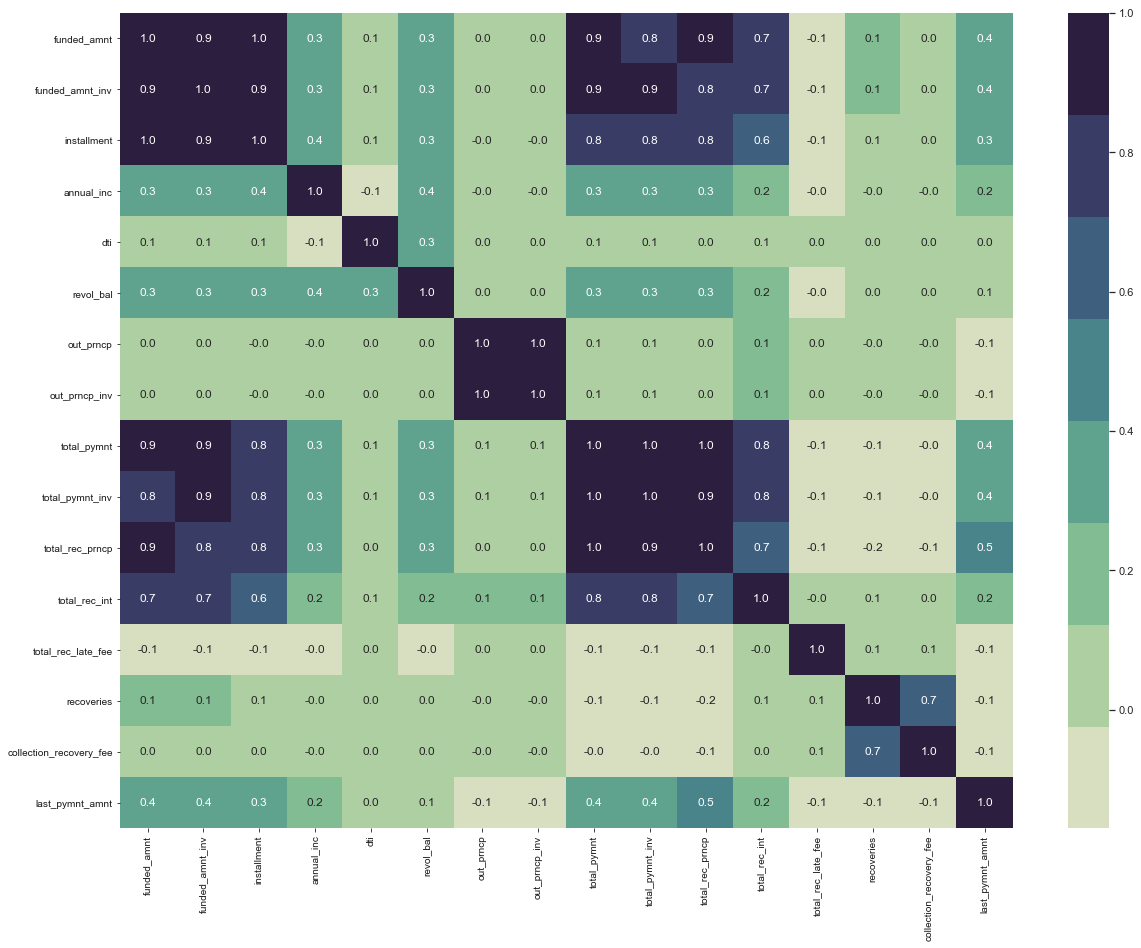

In [19]:
# prepairing a corrplot
plt.subplots(figsize=(20,15))
sns.set()
sns.heatmap(loan_final[loan_final.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

/Users/nikhiltiwari/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


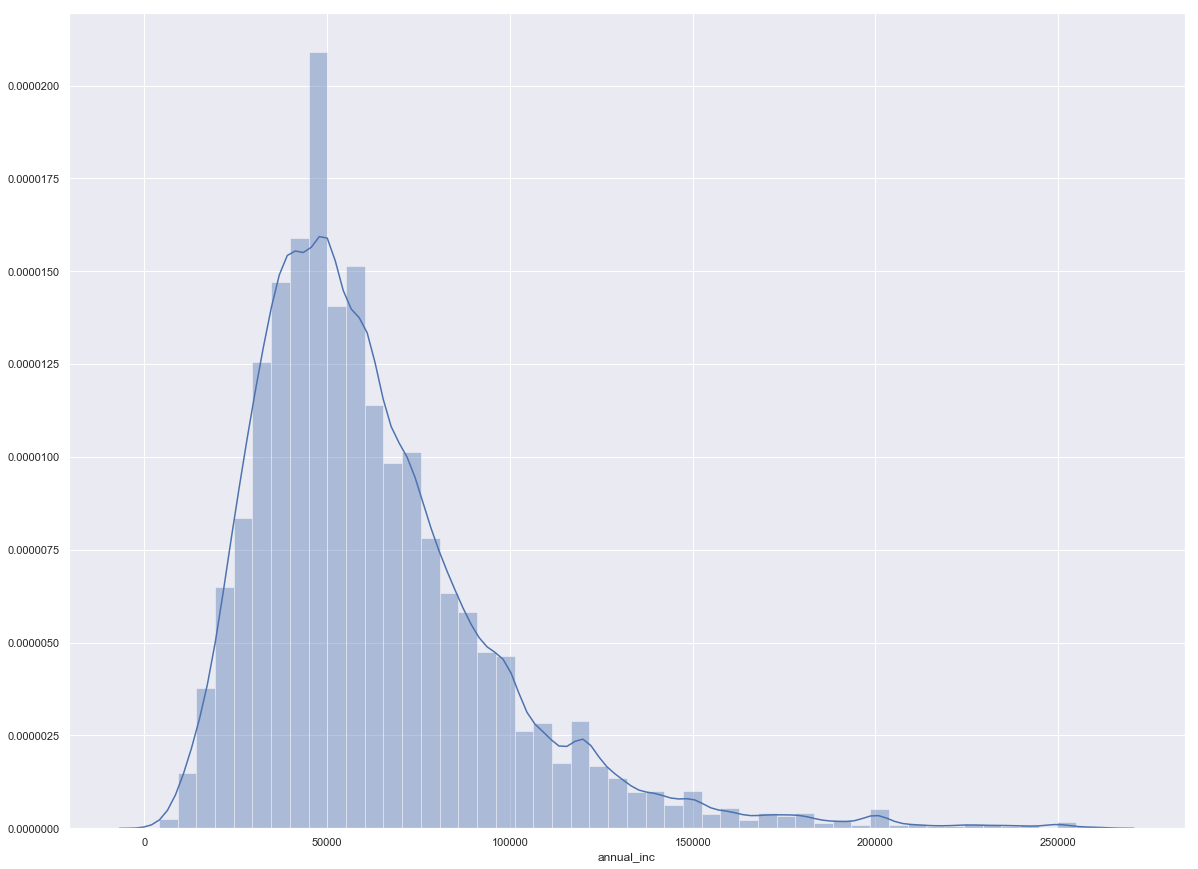

In [20]:
# income distribution
plt.subplots(figsize=(20,15))
sns.distplot(loan_final['annual_inc'])

/Users/nikhiltiwari/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


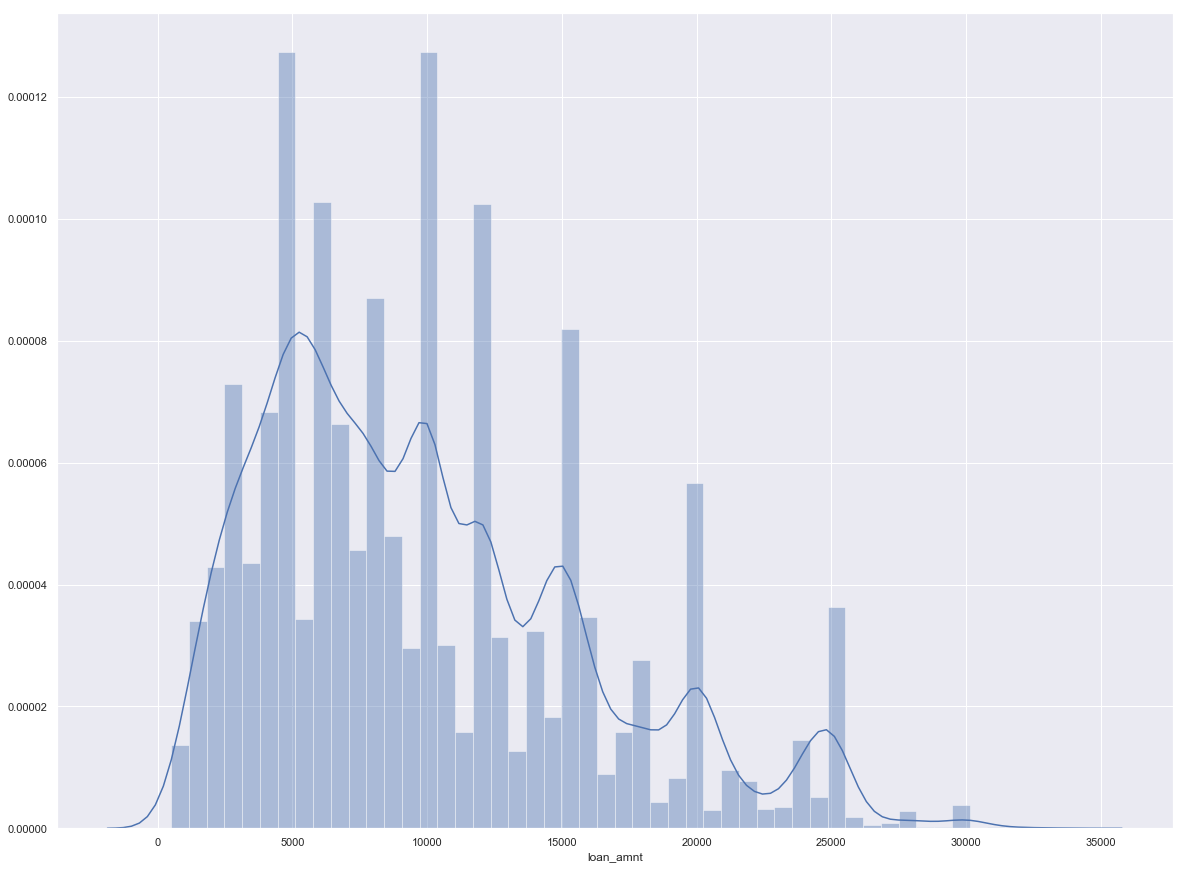

In [21]:
# loan distribution
plt.subplots(figsize=(20,15))
sns.distplot(loan_final['loan_amnt'])

/Users/nikhiltiwari/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


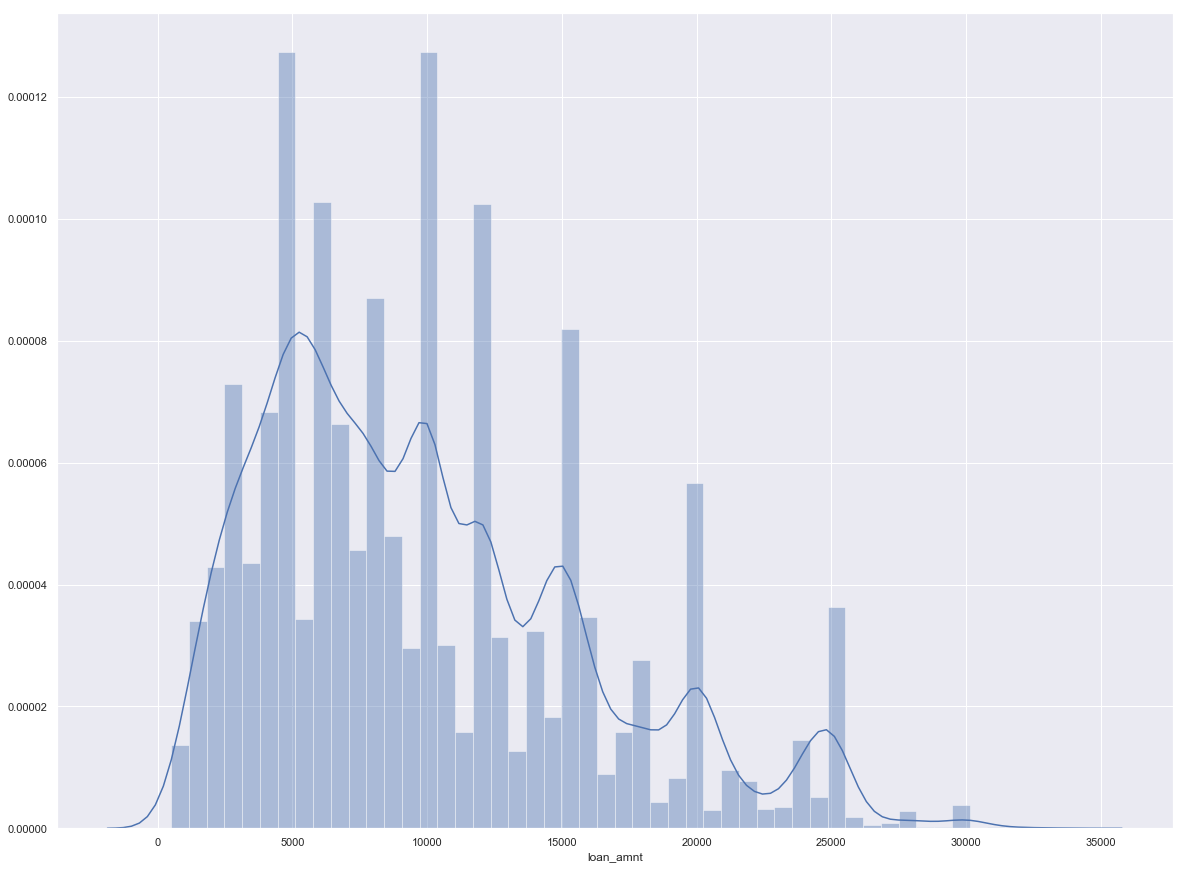

In [22]:
# loan distribution
plt.subplots(figsize=(20,15))
sns.distplot(loan_final['loan_amnt'])

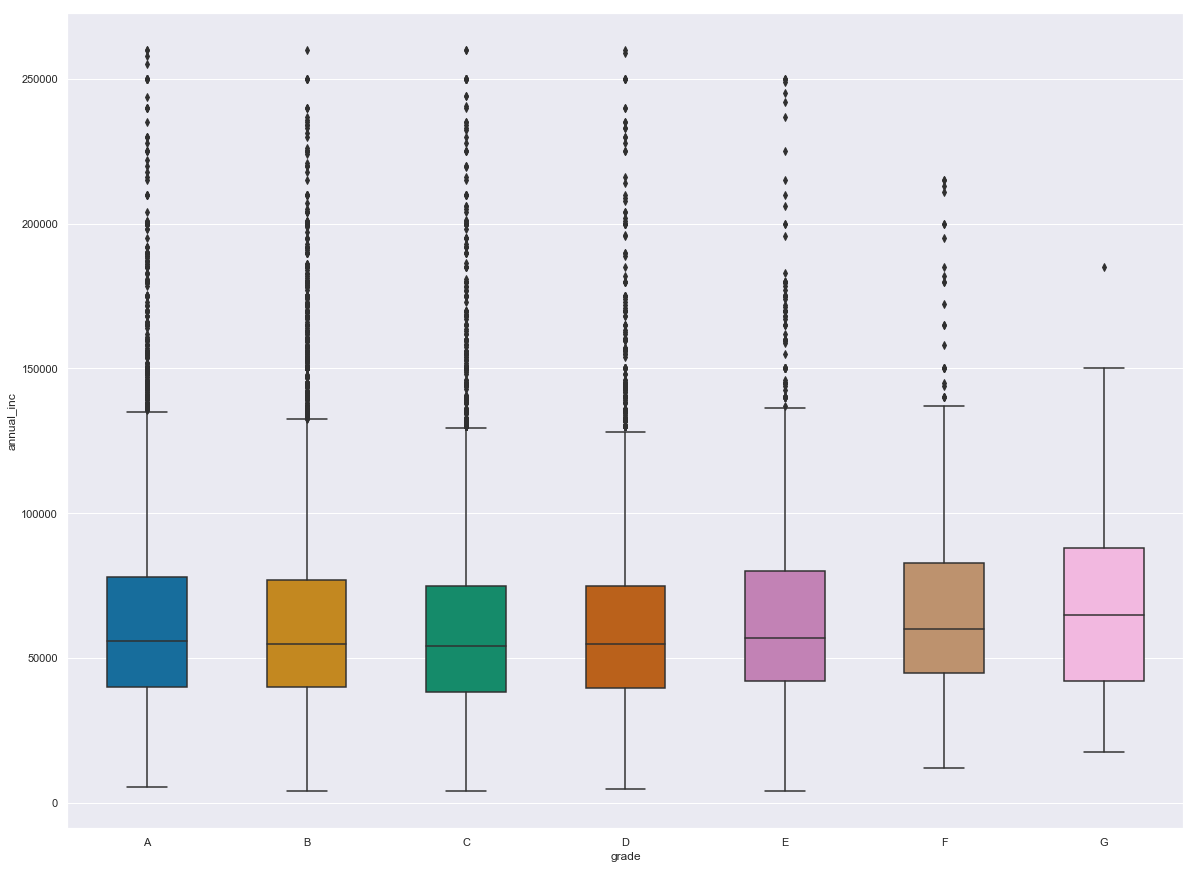

In [23]:
# Box Plot - Annual income vs Grade
plt.subplots(figsize=(20,15))
sns.boxplot(x='grade', y='annual_inc', width = 0.5, palette="colorblind",
            data=loan_final)

### The median income as well as the range of the incomes is almost same across all the grades. It is a little more for grades E,F and G.


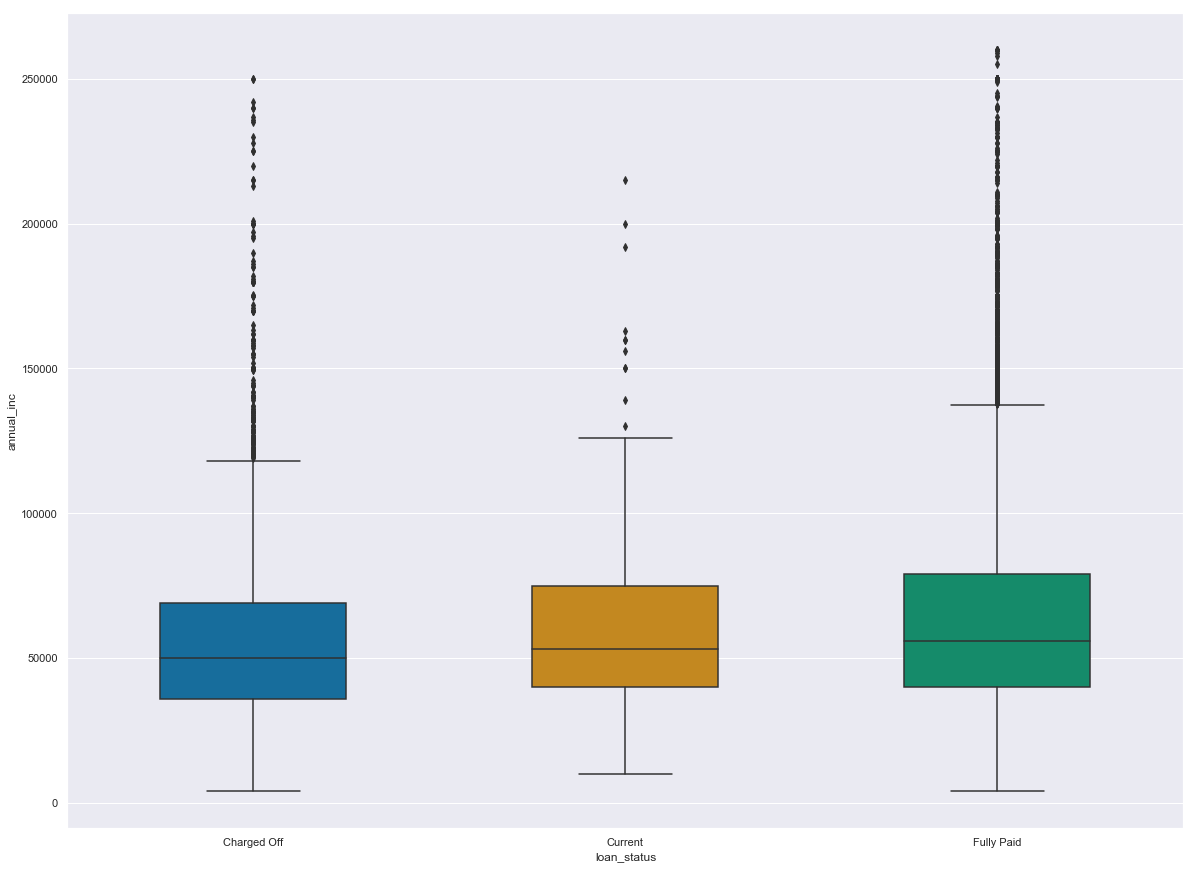

In [24]:
# Box Plot - Annual income vs Loan Status
plt.subplots(figsize=(20,15))
sns.boxplot(x='loan_status', y='annual_inc',  width = 0.5, palette="colorblind",
            data=loan_final)

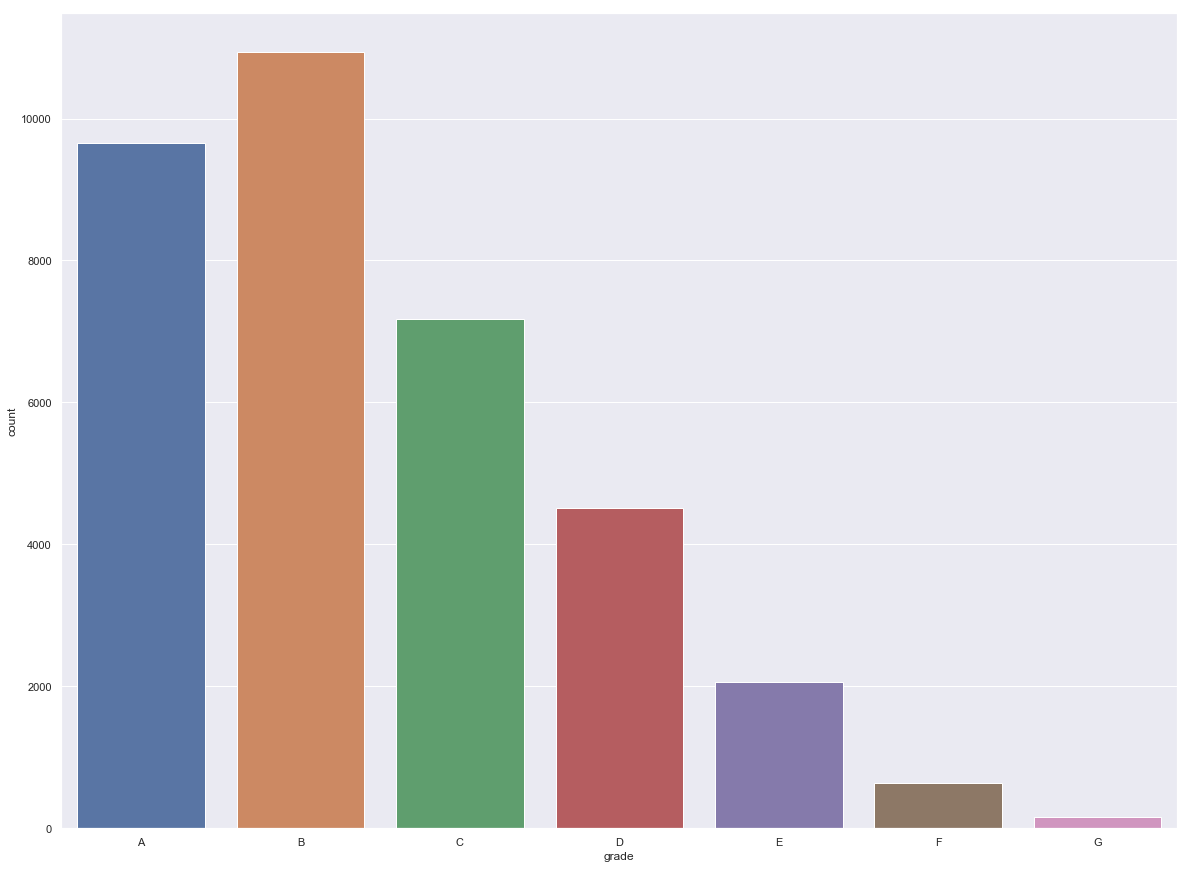

In [25]:
# count of loans vs grades
plt.subplots(figsize=(20,15))
sns.countplot(x='grade', data= loan_final)

### maximum loans have been sanctioned to Grade 'B' 

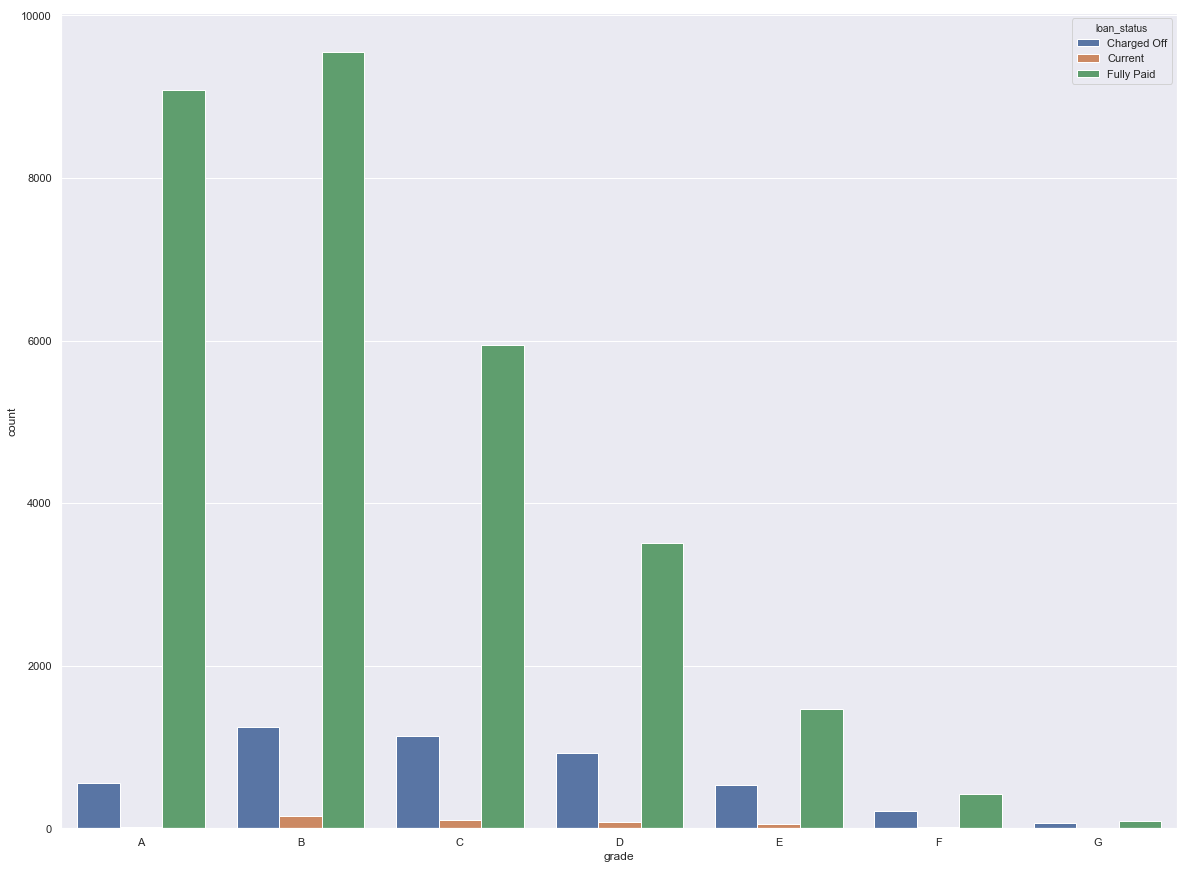

In [26]:
# gradewise count of loans vs their status
plt.subplots(figsize=(20,15))
sns.countplot(x='grade', hue = 'loan_status',data= loan_final)

### Grade B has maximum loans sanctioned and has maximum charged off loans, agency should revisit their sanction criteria.

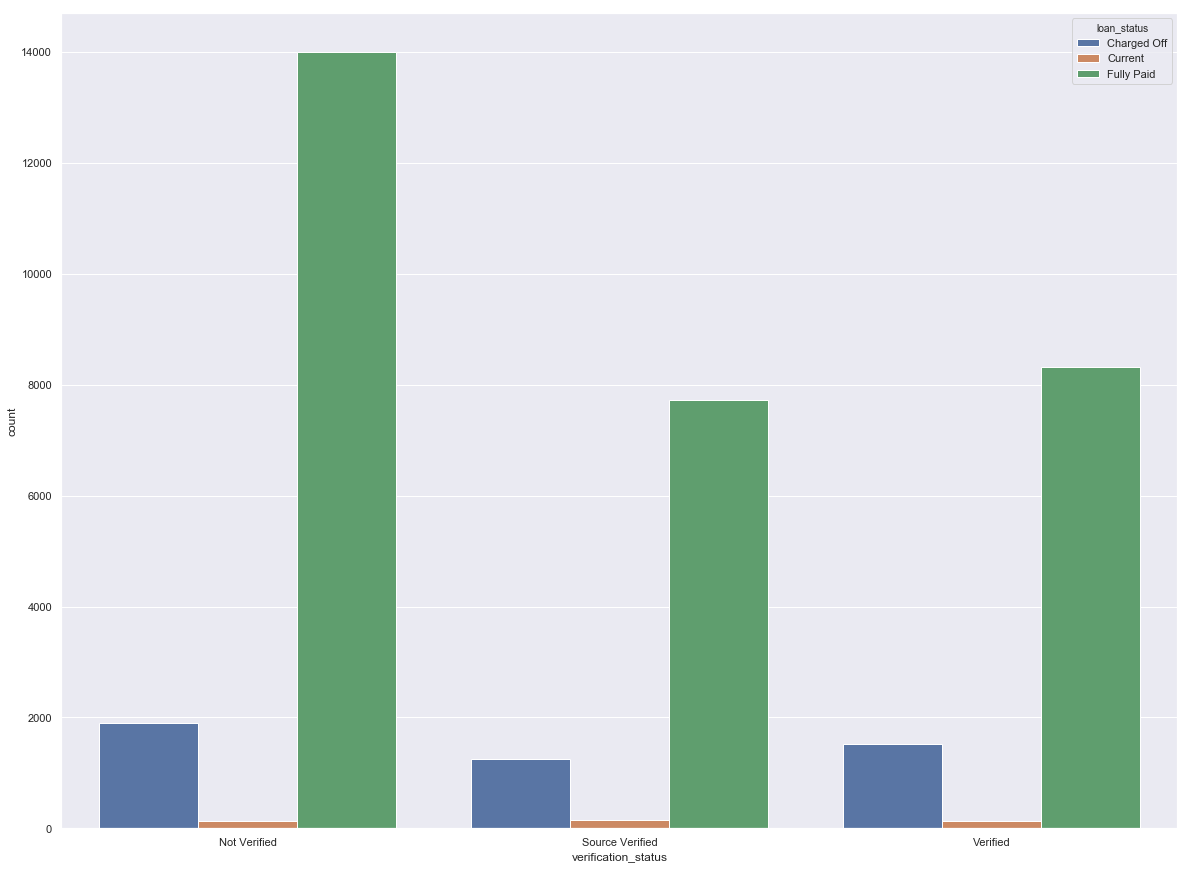

In [27]:
# loan status vs verification 
plt.subplots(figsize=(20,15))
sns.countplot(x='verification_status', hue = 'loan_status',data= loan_final)

### as default rate is relatively higher in case of not verified loans extra precautions should be exercised before sanctioning (although its a high risk and high reward scenario). a complete verification should be done.

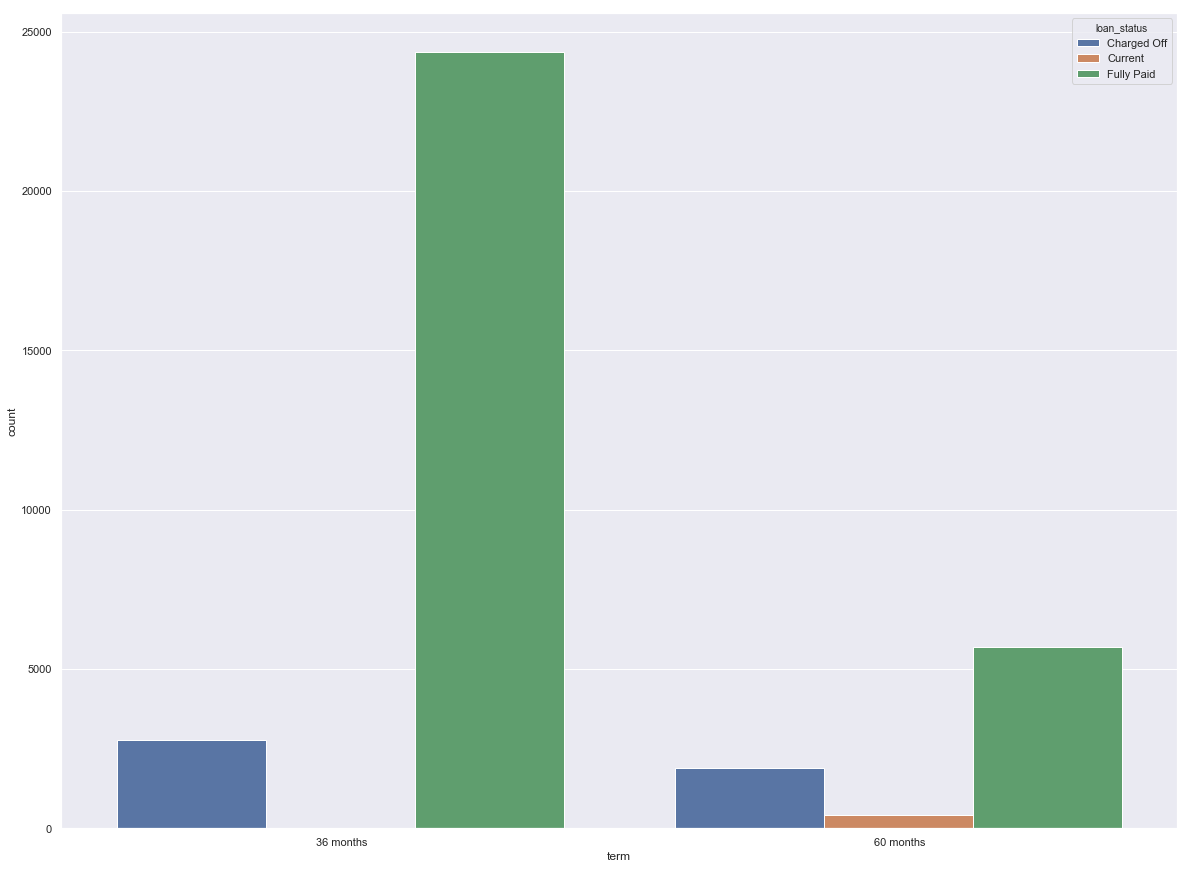

In [28]:
# loan status vs loan term
plt.subplots(figsize=(20,15))
sns.countplot(x='term', hue = 'loan_status',data= loan_final)

/Users/nikhiltiwari/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


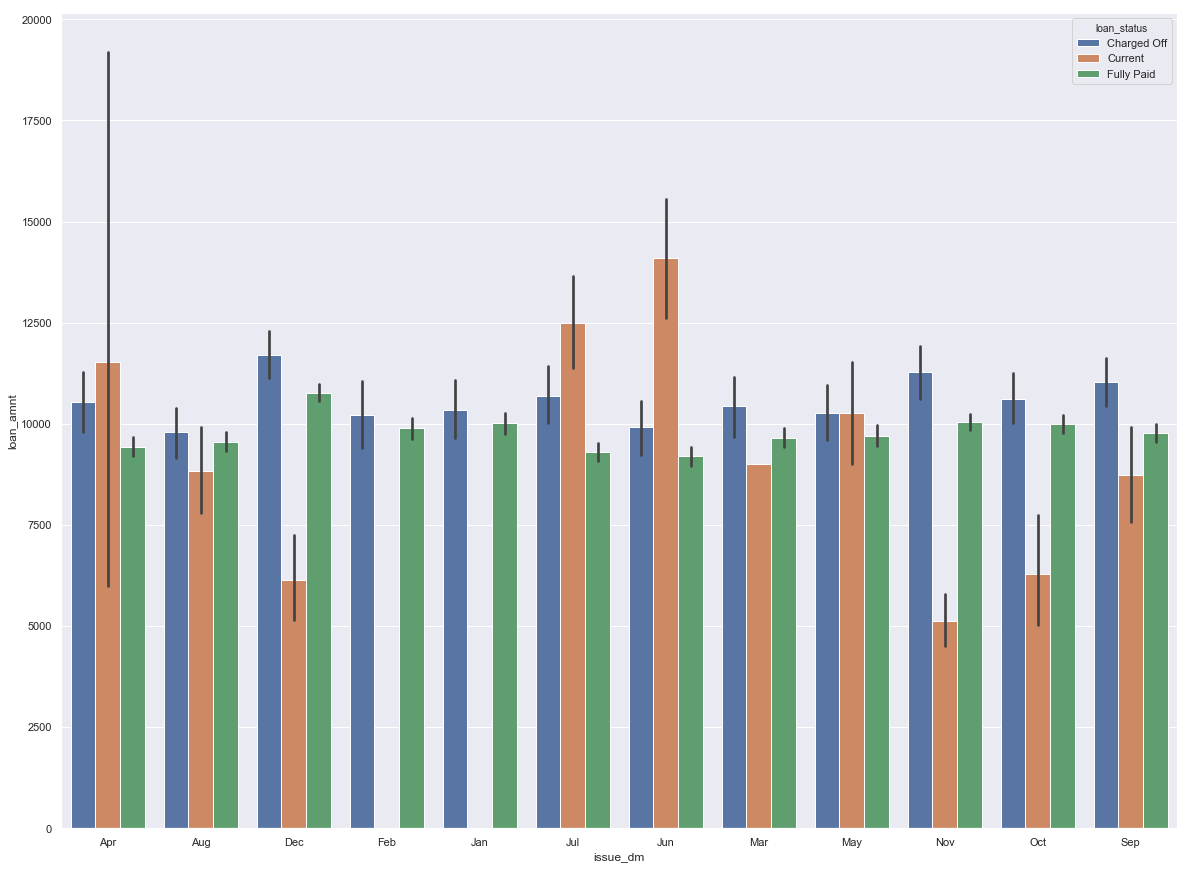

In [30]:
# loan status vs issue_d
plt.subplots(figsize=(20,15))
sns.barplot(x='issue_dm', y = 'loan_amnt', hue = 'loan_status',data= loan_final)

# Conclusion
* After examining annual income and grades, we have found that all the grades have almost similar distribution.
* Annual Income, interest rate and verification have bearing on whether an loan will become fully paid or become charged off. Hence, these parameters need to be critically monitored.
* In the current disbursal, from grade D to grade G, the percentage of defaults are more. Grades also play an important role in loan disbursal and repayment and can be reference from current data to make future decisions.
* Target based/ last minute loan disbursals should be avoided as deafult rate in last month is very high.